# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [51]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [52]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | stanley
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | puente nacional
Processing Record 5 of Set 1 | ribeira grande
Processing Record 6 of Set 1 | puerto natales
Processing Record 7 of Set 1 | saipan
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | kill devil hills
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | haiku-pauwela
Processing Record 14 of Set 1 | katabu
Processing Record 15 of Set 1 | rikaze
Processing Record 16 of Set 1 | kiunga
Processing Record 17 of Set 1 | uturoa
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | devinuwara
City not found. Skipping...
Processing Record 20 of Set 1 | macau
Processing Record 21 of Set 1 | dawei
Processing Record 22 of Set 1 

City not found. Skipping...
Processing Record 38 of Set 4 | ust-nera
Processing Record 39 of Set 4 | barra de santo antonio
Processing Record 40 of Set 4 | porto murtinho
Processing Record 41 of Set 4 | maydanshakhr
Processing Record 42 of Set 4 | lihue
Processing Record 43 of Set 4 | vila velha
Processing Record 44 of Set 4 | susuman
Processing Record 45 of Set 4 | katsuura
Processing Record 46 of Set 4 | arrifes
Processing Record 47 of Set 4 | bereket
Processing Record 48 of Set 4 | abu jibeha
Processing Record 49 of Set 4 | chul'man
Processing Record 0 of Set 5 | pangody
Processing Record 1 of Set 5 | hawaiian paradise park
Processing Record 2 of Set 5 | vingt cinq
City not found. Skipping...
Processing Record 3 of Set 5 | santa elena de uairen
Processing Record 4 of Set 5 | bishkul
Processing Record 5 of Set 5 | kaka
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | college
Processing Record 8 of Set 5 | port douglas
Processing Record 9 of Set 5 | egilsstadir
P

Processing Record 26 of Set 8 | glace bay
Processing Record 27 of Set 8 | sadjoavato
Processing Record 28 of Set 8 | kyshtovka
Processing Record 29 of Set 8 | rongelap
Processing Record 30 of Set 8 | machali
Processing Record 31 of Set 8 | hamilton
Processing Record 32 of Set 8 | axim
Processing Record 33 of Set 8 | berezovo
Processing Record 34 of Set 8 | camapua
Processing Record 35 of Set 8 | chui
Processing Record 36 of Set 8 | paita
Processing Record 37 of Set 8 | yandev
Processing Record 38 of Set 8 | selfoss
Processing Record 39 of Set 8 | puerto san carlos
City not found. Skipping...
Processing Record 40 of Set 8 | sirte
Processing Record 41 of Set 8 | saint-philippe
Processing Record 42 of Set 8 | opuwo
Processing Record 43 of Set 8 | alofi
Processing Record 44 of Set 8 | buka
Processing Record 45 of Set 8 | kingston
Processing Record 46 of Set 8 | matthew town
Processing Record 47 of Set 8 | takaungu
Processing Record 48 of Set 8 | vernon
Processing Record 49 of Set 8 | crane

Processing Record 13 of Set 12 | yarmouth
Processing Record 14 of Set 12 | itaituba
Processing Record 15 of Set 12 | aegina
Processing Record 16 of Set 12 | elliot lake
Processing Record 17 of Set 12 | thunder bay
Processing Record 18 of Set 12 | niamey
Processing Record 19 of Set 12 | midvagur
Processing Record 20 of Set 12 | nikolayevsk-on-amure
Processing Record 21 of Set 12 | new norfolk
Processing Record 22 of Set 12 | saint-pierre
Processing Record 23 of Set 12 | wewak
Processing Record 24 of Set 12 | usinsk
Processing Record 25 of Set 12 | daru
Processing Record 26 of Set 12 | freetown
Processing Record 27 of Set 12 | san lawrenz
Processing Record 28 of Set 12 | revelstoke
Processing Record 29 of Set 12 | chom thong
Processing Record 30 of Set 12 | luderitz
Processing Record 31 of Set 12 | oban
Processing Record 32 of Set 12 | sainte-rose
Processing Record 33 of Set 12 | fabens
Processing Record 34 of Set 12 | amos
Processing Record 35 of Set 12 | santo amaro da imperatriz
Proce

In [53]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [54]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,stanley,54.8680,-1.6985,14.60,97,100,1.54,GB,1725243704
1,bethel,41.3712,-73.4140,21.75,90,0,0.89,US,1725243578
2,ushuaia,-54.8000,-68.3000,5.81,70,20,7.72,AR,1725243629
3,puente nacional,5.8774,-73.6781,15.82,95,53,1.69,CO,1725243704
4,ribeira grande,38.5167,-28.7000,22.65,77,56,3.58,PT,1725243704


In [55]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [56]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,stanley,54.8680,-1.6985,14.60,97,100,1.54,GB,1725243704
1,bethel,41.3712,-73.4140,21.75,90,0,0.89,US,1725243578
2,ushuaia,-54.8000,-68.3000,5.81,70,20,7.72,AR,1725243629
3,puente nacional,5.8774,-73.6781,15.82,95,53,1.69,CO,1725243704
4,ribeira grande,38.5167,-28.7000,22.65,77,56,3.58,PT,1725243704


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

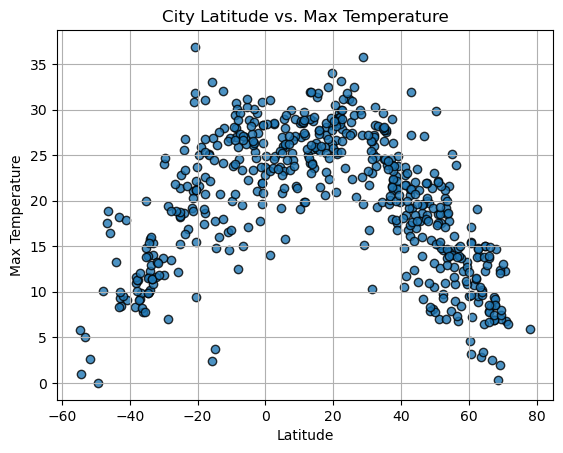

In [57]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

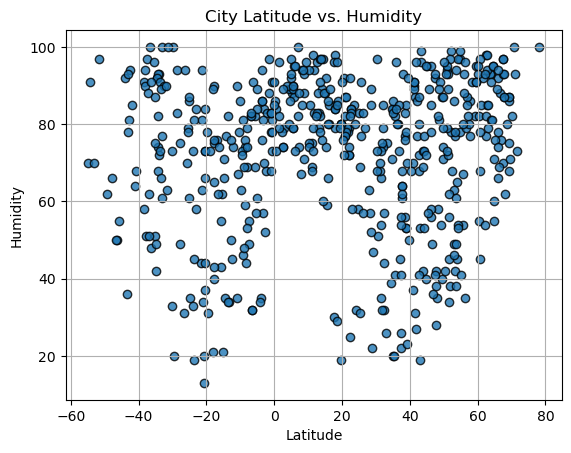

In [58]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"],edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

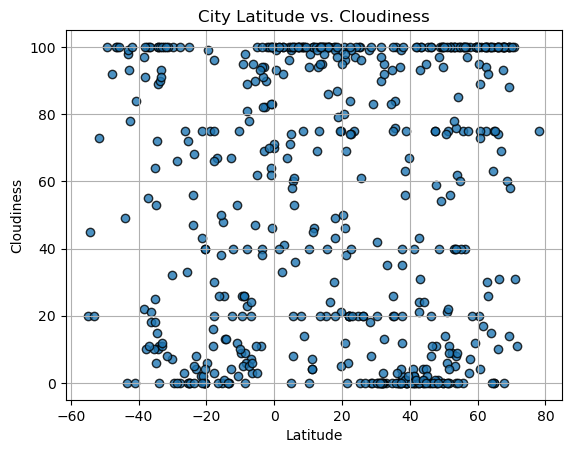

In [59]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

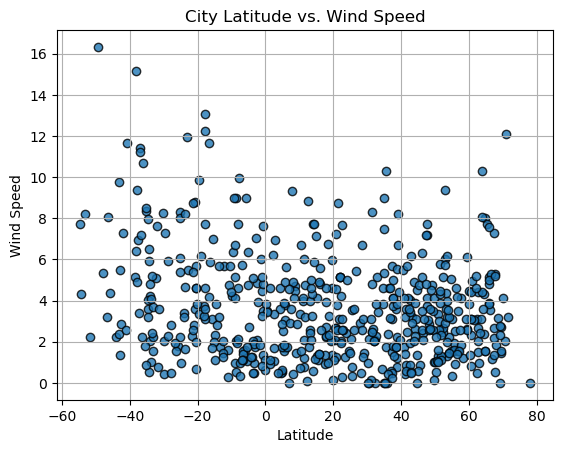

In [60]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=1, marker="o", alpha=0.8)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [61]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, hemisphere):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate the regression line
    regress_values = x_values * slope + intercept
    
    # Create equation of line string
    line_eq = f"y = {slope: 0.2f}x + {intercept: .2f}"
    
    # Plot the scatter plot
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, (min(x_values) + 5, min(y_values) + 5), fontsize=15, color="red")
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f"{title} ({hemisphere})")
    
    # Display the r-squared value
    print(f"The r-squared is: {rvalue**2:.3f}")
    
    # Show the plot
    plt.grid(True)
    plt.show()

In [37]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,uliastay,47.7417,96.8444,8.99,60,16,2.33,MN,1725232865
1,nizhnyaya poyma,56.1622,97.1933,7.68,96,100,1.22,RU,1725232865
2,marion,39.7684,-86.1555,26.21,59,20,6.69,US,1725232865
4,college,64.8569,-147.8028,13.03,67,100,0.00,US,1725232865
5,remire-montjoly,4.9167,-52.2667,27.02,89,75,2.06,GF,1725232866


In [62]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,ushuaia,-54.8000,-68.3000,5.81,70,20,7.72,AR,1725243629
5,puerto natales,-51.7236,-72.4875,2.58,97,73,2.23,CL,1725243704
7,waitangi,-43.9535,-176.5597,13.23,92,49,2.24,NZ,1725243704
11,port-aux-francais,-49.3500,70.2167,-0.01,62,100,16.33,TF,1725243705
13,katabu,-4.9333,122.5167,28.84,61,100,2.70,ID,1725243705


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.464


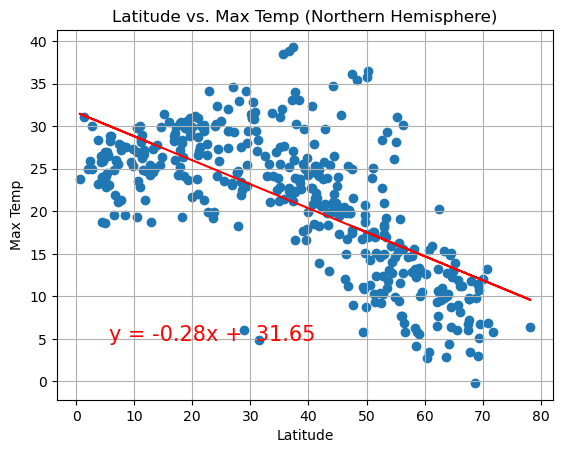

In [63]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude vs. Max Temp", "Latitude", "Max Temp", "Northern Hemisphere")

The r-squared is: 0.539


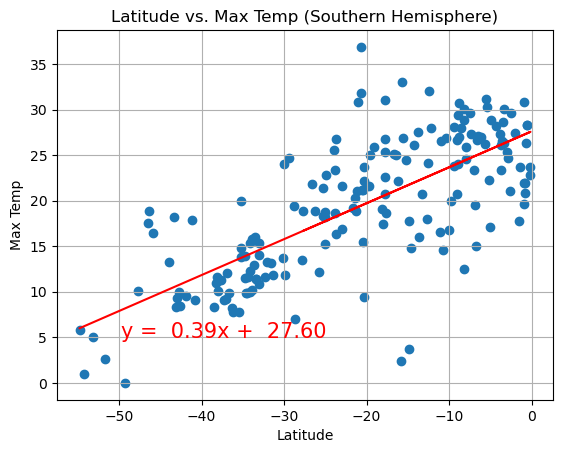

In [64]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude vs. Max Temp", "Latitude", "Max Temp", "Southern Hemisphere")

**Discussion about the linear relationship:** the linear regression shows that there is an inverse relationship between temperature and latitude in the Northern Hemisphere, where temperatures tend to decrease as latitude increases, moving away from the equator. In the Southern Hemisphere, a similar inverse relationship is observed, temperatures also decrease as latitude increases. The r-sqaured value indicates how well the data fits this linear model.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.005


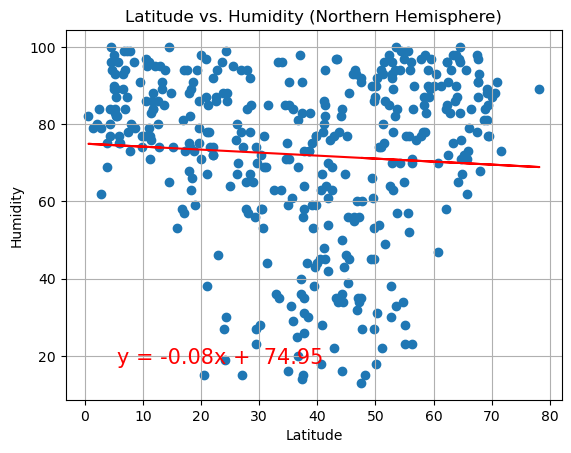

In [65]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude vs. Humidity", "Latitude", "Humidity", "Northern Hemisphere")

The r-squared is: 0.007


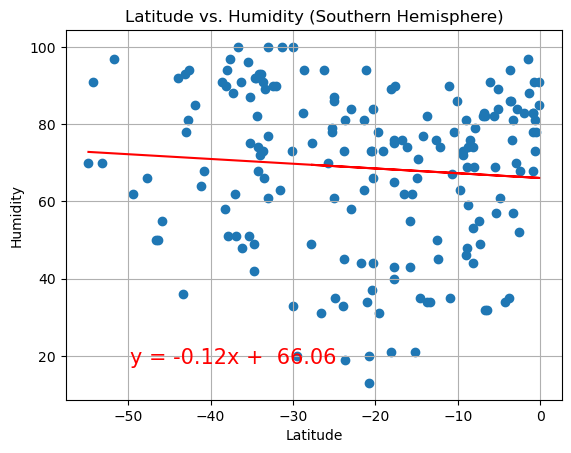

In [66]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude vs. Humidity", "Latitude", "Humidity", "Southern Hemisphere")

**Discussion about the linear relationship:** The regression analysis shows a weak relationship between latitude and humidity. Similar to the Northern Hemisphere, the relationship between humidity and latitude also looks week. Humidity is influenced by a variety of factors, which may dilute the relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.000


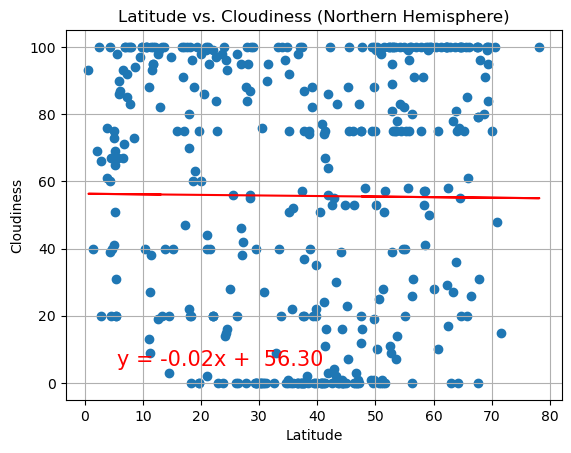

In [67]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude vs. Cloudiness", "Latitude", "Cloudiness", "Northern Hemisphere")

The r-squared is: 0.003


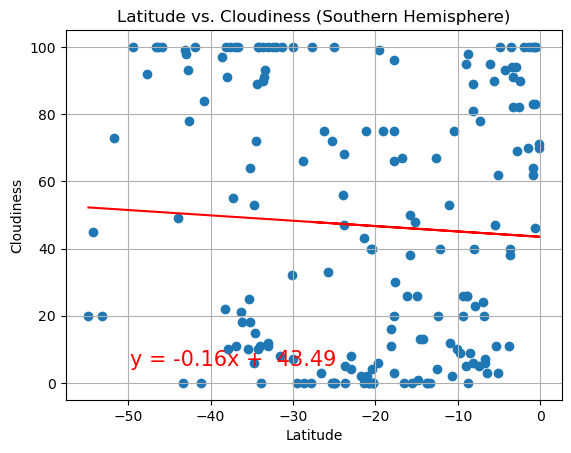

In [68]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], 
                       "Latitude vs. Cloudiness", "Latitude", "Cloudiness", "Southern Hemisphere")

**Discussion about the linear relationship:** The 2 graphs suggest very week negative correslation between latitude and couldiness, the slope indicates that latitude has a minimal impact on cloudiness, and other factors are likely more significant in determining cloud cover.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.000


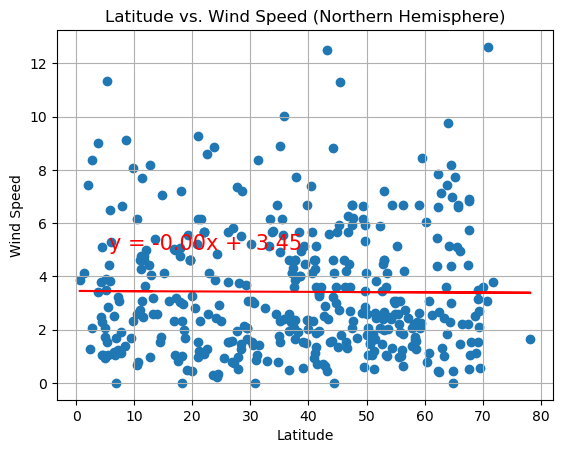

In [69]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 
                       "Latitude vs. Wind Speed", "Latitude", "Wind Speed", "Northern Hemisphere")


The r-squared is: 0.075


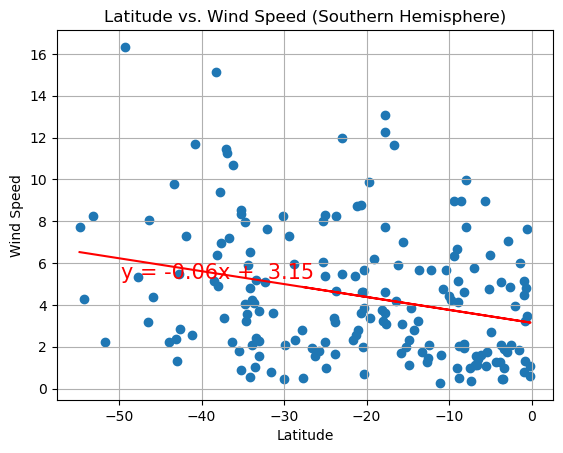

In [70]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], 
                       "Latitude vs. Wind Speed", "Latitude", "Wind Speed", "Southern Hemisphere")


**Discussion about the linear relationship:** The equation for northern Hemisphere indicates an extremely weak correlation between latitude and wind speed. The near-zero slope suggests that latitude has virtually no effect on wind speed, which is more likely determined by local geographic features and weather conditions.The southern hemisphere shows a slightly stronger but still weak negative correlation between latitude and wind speed, suggesting that as latitude increases, wind speed may decrease slightly, but the relationship looks very weak.